<a href="https://colab.research.google.com/github/Actulus/MI/blob/main/lab3/Lab3_MLP_with_a_built_in_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alkalmazottak lemorzsolódása
Ebben a részben az alkalmazottak lemorzsolódásának előrejelzését hajtjuk végre a Multi-Layer Perceptron segítségével. Az alkalmazottak lemorzsolódásának előrejelzése segít jobb munkavállalói megtartási tervek kialakításában és a munkavállalói elégedettség javításában.

# Adatkészlet betöltése
Először töltsük be a szükséges HR-adatkészletet a pandák read CSV funkciójával. Az adatokat az alábbi linkről töltheti le:

In [1]:
#import modules
import matplotlib.pyplot as plt # for plotting graphs
import numpy as np
import pandas as pd

# Import LabelEncoder
from sklearn import preprocessing

# Import MLPClassifer
from sklearn.neural_network import MLPClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#import module
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data
path='/content/drive/My Drive/MI/lab3/HR_comma_sep.csv'

data=pd.read_csv(path)

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Előfeldolgozás: Címkekódolás
Sok gépi tanulási algoritmus numerikus bemeneti adatokat igényel, ezért a kategorikus oszlopokat egy numerikus oszlopban kell ábrázolnia. Az adatok kódolásához minden értéket leképezhet egy számra. például. A fizetés oszlop értéke alacsony:0, közepes:1 és magas:2 formában jeleníthető meg. Ezt a folyamatot címkekódolásnak nevezik. A sklearnben ezt a LabelEncoder segítségével tehetjük meg.

Itt importáltuk az előfeldolgozó modult, és létrehoztuk a Label Encoder objektumot. Ezzel a LabelEncoder objektummal illesztheti és átalakíthatja a „fizetés” és a „Részlegek” oszlopot numerikus oszlopokká.

In [5]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

# Ossza fel az adatkészletet
A modell teljesítményének értékeléséhez az adatkészletet fel kell osztanunk egy tanítókészletre és egy tesztkészletre. Osszuk fel az adatkészletet a train_test_split() függvény használatával. alapvetően 3 paramétert kell átadnia: jellemzők, cél és teszt_készlet mérete.

In [6]:
# Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
y=data['left']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

A cégen belül dolgozók elégedetségéenek csoportosítása:

*   A zöld a lejobban elégedett
*   A szürke kevésbé
*   A piros inkább tovább áll vagy szív és marad

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-7-21d612d6491f>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=colormap[left_emp['label']],cmap='Accent')


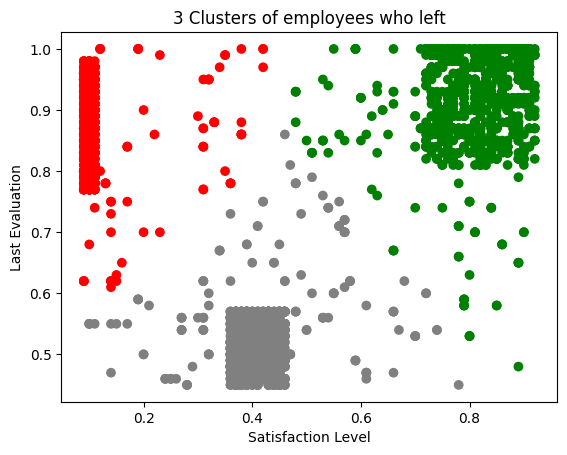

In [7]:
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# use colormap
colormap = np.array(['g', 'r', 'gray'])

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=colormap[left_emp['label']],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

# Osztályozási modell felépítése
Építsünk fel egy alkalmazotti lemorzsolódási modellt. Itt a célunk a lemorzsolódás előrejelzése az MLPClassifier segítségével.

Először importálja az MLPClassifier modult, és hozzon létre MLP Classifier objektumot az MLPClassifier() függvény segítségével. Ezután illessze a modellt a tanulásra a fit() segítségével, és hajtson végre előrejelzést a tesztkészleten a predikció() segítségével.

In [100]:
# Create model object - minden iteracional ugyanaz fut le
"""clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    activation='relu',
                    early_stopping=True,
                    max_iter=300,
                    learning_rate_init=0.01,
                    verbose=True)"""
# hidden_layer_sizes=(6,5), learning_rate_init=0.01, random_state=5 Validation score: 0.912381

clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    activation='relu',
                    early_stopping=True,
                    max_iter=100,
                    learning_rate_init=0.001,
                    learning_rate='adaptive',
                    verbose=True,
                    solver='adam',
                    momentum=0.8)

# kisebbekkel jobb ertek, mint nagyobbakkal, de a tobbi parametertol is fugg
# hidden_layer_sizes=(10) -> Validation score: 0.767619
# hidden_layer_sizes=(30) -> Validation score: 0.757143
# hidden_layer_sizes=(3) -> Validation score: 0.761905
# hidden_layer_sizes=(6,3) -> Validation score: 0.901905

# kisebbekkel jobb ertek, mint nagyobbakkal, de a tobbi parametertol is fugg
# learning_rate_init=0.1 -> Validation score: 0.761905
# learning_rate_init=0.001 -> Validation score: 0.926667
# learning_rate_init=0.009 -> Validation score: 0.904762

# nagyobakkal jobb ertek, mint kisebbekkel, de a tobbi parametertol is fugg
# random_state=10 -> Validation score: 0.761905
# random_state=2 -> Validation score: 0.757143
# random_state=15 -> Validation score: 0.761905

# activation='identity' -> ront: Validation score: 0.760952
# activation='logistic' -> Validation score: 0.761905
# activation='tanh' -> Validation score: 0.761905

# solver='adam' -> Validation score: 0.926667
# solver='sgd' -> Validation score: 0.761905
# solver='lbfgs' -> -

# learning_rate='constant' -> Validation score: 0.926667
# learning_rate='invscaling' -> Validation score: 0.926667
# learning_rate='adaptive' -> Validation score: 0.926667

# max_iter megszabja, hogy max hanyszor iteraljon az algoritmus a data-n
# max_iter=50 -> Validation score: 0.909524
# max_iter=100 -> Validation score: 0.932381

# momentum - csak solver='sgd'-vel mukodik -> 0.8 -> Iteration 80, loss = 0.58198978 Validation score: 0.756190

# ha max_iter=150 hamarabb leall, mert a loss nem javult 10 epochon keresztul

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.73757758
Validation score: 0.727619
Iteration 2, loss = 0.61555483
Validation score: 0.747619
Iteration 3, loss = 0.60043498
Validation score: 0.753333
Iteration 4, loss = 0.59764304
Validation score: 0.750476
Iteration 5, loss = 0.59437963
Validation score: 0.754286
Iteration 6, loss = 0.59133048
Validation score: 0.759048
Iteration 7, loss = 0.58810092
Validation score: 0.755238
Iteration 8, loss = 0.58641747
Validation score: 0.761905
Iteration 9, loss = 0.58353618
Validation score: 0.767619
Iteration 10, loss = 0.58007525
Validation score: 0.768571
Iteration 11, loss = 0.57656050
Validation score: 0.779048
Iteration 12, loss = 0.57395274
Validation score: 0.776190
Iteration 13, loss = 0.56997333
Validation score: 0.761905
Iteration 14, loss = 0.55828730
Validation score: 0.761905
Iteration 15, loss = 0.52483548
Validation score: 0.761905
Iteration 16, loss = 0.50165947
Validation score: 0.761905
Iteration 17, loss = 0.48375921
Validation score: 0.760000
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(6, 5),
              learning_rate='adaptive', max_iter=150, momentum=0.8,
              random_state=5, verbose=True)

Paraméterek:
```
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    early_stopping=True,
                    max_iter=300,
                    learning_rate_init=0.01,
                    verbose=True)
```
hidden_layer_sizes: ez egy sor, ahol minden elem egy réteget képvisel, értéke pedig az egyes rejtett rétegeken lévő neuronok számát.

random_state: Meghatározza a súlyok és a torzítás inicializálásának véletlenszámát.

early_stopping: bool, default=False -->
Meghatározza, hogy használja-e a korai leállítást a képzés befejezésére, ha az érvényesítési pontszám nem javul. Ha igazra van állítva, akkor automatikusan félreteszi a betanítási adatok 10%-át érvényesítésként, és leállítja a képzést, ha az érvényesítési pontszám nem javul legalább X-szel n_iter_no_change egymást követő időszakban. A felosztás rétegzett, kivéve a többcímkés beállítást. Ha a korai leállítás Hamis, akkor az edzés leáll, ha az edzési veszteség nem javul X-nél nagyobb mértékben az edzéskészleten átívelő n_iter_no_change egymást követő lépések során. Csak akkor hatásos, ha solver='sgd' vagy 'adam'.

max_iter: int, alapértelmezett=200 --> Az iterációk maximális száma. A megoldó addig iterál, amíg a konvergencia (amit az „X” határoz meg) vagy ennyi iterációig. A sztochasztikus megoldóknál ('sgd', 'adam') vegye figyelembe, hogy ez határozza meg az epochák számát (az egyes adatpontok hányszor kerül felhasználásra), nem pedig a gradiens lépéseinek számát.

learning_rate_init: Korábban a súlyok frissítésének lépésszámát szabályozta.

activation: A rejtett réteg aktiválási funkciója. Példák: identitás, logisztika, tanh és relu. alapértelmezés szerint a relu aktiváló funkcióként használatos.


verbose: Az előrehaladási üzenetek szabványos kimenetre történő nyomtatására szolgál.

# Készítsen előrejelzést(Prediction) és értékelje a modellt
Ebben a részben előrejelzéseket készítünk a tesztadatkészletről, és értékeljük a modell pontosságát a tesztadatkészlet rendelkezésre álló tényleges címkéi alapján.

# Eredmények:

In [9]:
# Make prediction on test dataset
ypred=clf.predict(X_test) # eredmeny kiertekelese

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, ypred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.9137777777777778
Precision: 0.8184357541899442
Recall: 0.8199626865671642


In [10]:
print("Best validation score", clf.best_validation_score_)
print("Vorst lost score", clf.loss_)

Best validation score 0.9123809523809524
Vorst lost score 0.25165638869894724


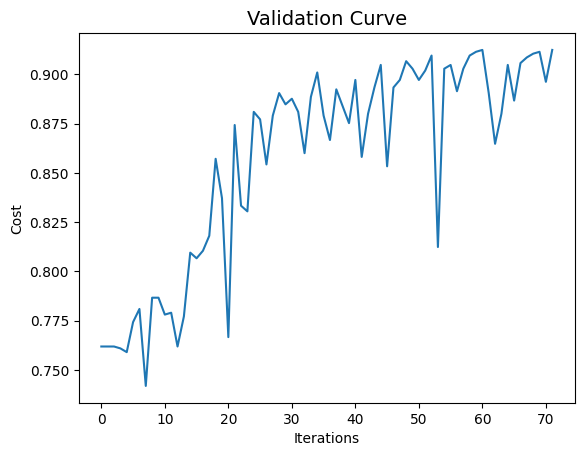

In [11]:
plt.plot(clf.validation_scores_)
plt.title("Validation Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

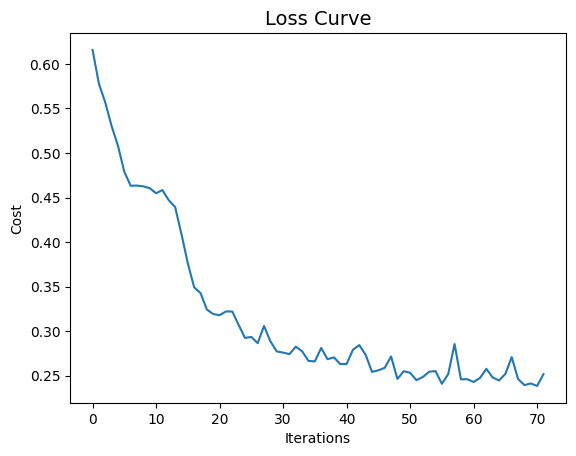

In [12]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Megoldandó feladatok (amelyeket be kell küldeni):

Segítő link: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Az alábbi modelt módosítsd:

clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

I.
1.   Változtasd a meglévő paramétereket: hidden_layer_sizes, learning_rate_init, random_state.
Mit változtatnak? Rontanak vagy segítenek? Dokumentáld le. Írd le az észrevételeidet.
2.   Próbáld ki a következő paramétereket: activation, solver, learning_rate.
Mit változtatnak? Rontanak segítenek? Dokumentáld le. Írd le az észrevételeidet.
3.   Mit csinál a max_iter paraméter? Mi lenne ha 50-re lenne beállítva?
4.   Vezesd be az alábbi paramétert 'momentum', a modelbe mire való? Mit csinál? Mit változtat?
5.   Melyik beállításokkal lesz a legjobb eredmény?
6.   Miért áll le hamarabb, mint a max iteráció?
7.   Mire való a GridSearchCV? Próbáld ki. Becs szó sokat segít majd, de ha a végén csinálod ezt a feladatot akkor semmit nem segít. De én szóltam, és írtam :P

Mielőtt kérdeznéd, hogy mit írj be, hova s mit, nézz utánna. A lényeg, hogy kisérletezz és válaszokat kapjunk a feltett kérdésre.

In [14]:
#GridSearchCV egyszerű meghívása és beállítása
from sklearn.model_selection import GridSearchCV

parameters = {'activation':('relu', 'logistic'), 'solver':('sgd', 'adam')} # ha tul sok van, akkor orakig is futhat
clf = MLPClassifier()
gsCV = GridSearchCV(clf, parameters)

gsCV.fit(X_train, y_train)

print(gsCV.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{'activation': 'logistic', 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
